# GDP vs VACCINATION

In this project we seek to analyze the GDP for selected countries depending on the child vaccination rates. 

Imports and set magics:

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We have imported data in cvs-files from the OECD Databank. 

**The 1st dataset:**
The first dataset is an overview of GDP per capita for 34 countries in the world from 2018 to 2022. The included variables are year, GDP per capita and country. 

**The 2nd dataset:**
The second dataset is an overview of child vaccination rates for XX countries in the world from 2018 to 2022. The included variables are year, GDP per capita and country. 

# Importing and cleaning the first dataset

In [415]:
#import data
filename = 'GDP2.xlsx'
pd.read_excel(filename).head(7)

gdp = pd.read_excel(filename, skiprows=2)
gdp.head(7)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,2018,2019,2020,2021
0,NaN,NaN,Argentina,23290.7,14407.4,20981.4,23856.7
1,NaN,NaN,Australia,52991.2,52732.2,55690.3,61974.8
2,NaN,NaN,China,15466.3,16624.5,17176.9,19429.1
3,NaN,NaN,Denmark,57479.4,59884.1,60846.8,64914.2
4,NaN,NaN,Ireland,84824.0,89846.7,94038.0,106879.2
5,NaN,NaN,Mexico,20561.2,20244.6,18465.6,19438.8
6,NaN,NaN,UK,47219.5,49317.7,45872.2,49814.9


In [416]:
#Removing the first columns
drop_these = ['Unnamed: ' + str(num) for num in range(2)]
gdp.drop(drop_these, axis=1, inplace=True)
gdp.head(7)

,Unnamed: 2,2018,2019,2020,2021
0,Argentina,23290.7,14407.4,20981.4,23856.7
1,Australia,52991.2,52732.2,55690.3,61974.8
2,China,15466.3,16624.5,17176.9,19429.1
3,Denmark,57479.4,59884.1,60846.8,64914.2
4,Ireland,84824.0,89846.7,94038.0,106879.2
5,Mexico,20561.2,20244.6,18465.6,19438.8
6,UK,47219.5,49317.7,45872.2,49814.9


In [417]:
#Renaming the first column
gdp.rename(columns = {'Unnamed: 2':'country'}, inplace=True)
gdp.head(7)

,country,2018,2019,2020,2021
0,Argentina,23290.7,14407.4,20981.4,23856.7
1,Australia,52991.2,52732.2,55690.3,61974.8
2,China,15466.3,16624.5,17176.9,19429.1
3,Denmark,57479.4,59884.1,60846.8,64914.2
4,Ireland,84824.0,89846.7,94038.0,106879.2
5,Mexico,20561.2,20244.6,18465.6,19438.8
6,UK,47219.5,49317.7,45872.2,49814.9


In [418]:
gdp.rename(columns = {2018:'gdp2018'}, inplace=True)
gdp.rename(columns = {2019:'gdp2019'}, inplace=True)
gdp.rename(columns = {2020:'gdp2020'}, inplace=True)
gdp.rename(columns = {2021:'gdp2021'}, inplace=True)
gdp.head(7)

,country,gdp2018,gdp2019,gdp2020,gdp2021
0,Argentina,23290.7,14407.4,20981.4,23856.7
1,Australia,52991.2,52732.2,55690.3,61974.8
2,China,15466.3,16624.5,17176.9,19429.1
3,Denmark,57479.4,59884.1,60846.8,64914.2
4,Ireland,84824.0,89846.7,94038.0,106879.2
5,Mexico,20561.2,20244.6,18465.6,19438.8
6,UK,47219.5,49317.7,45872.2,49814.9


In [419]:
#Resetting the index
gdp.reset_index(inplace = True, drop = True)
gdp.iloc[0:7,:]

,country,gdp2018,gdp2019,gdp2020,gdp2021
0,Argentina,23290.7,14407.4,20981.4,23856.7
1,Australia,52991.2,52732.2,55690.3,61974.8
2,China,15466.3,16624.5,17176.9,19429.1
3,Denmark,57479.4,59884.1,60846.8,64914.2
4,Ireland,84824.0,89846.7,94038.0,106879.2
5,Mexico,20561.2,20244.6,18465.6,19438.8
6,UK,47219.5,49317.7,45872.2,49814.9


In [420]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7 non-null      object 
 1   gdp2018  7 non-null      float64
 2   gdp2019  7 non-null      float64
 3   gdp2020  7 non-null      float64
 4   gdp2021  7 non-null      float64
dtypes: float64(4), object(1)
memory usage: 408.0+ bytes


In [421]:
#Changing from wide to long
gdp_long = pd.wide_to_long(gdp, stubnames='gdp', i='country', j='year')
gdp_long.head(7)

,,gdp
country,year,
Argentina,2018,23290.7
Australia,2018,52991.2
China,2018,15466.3
Denmark,2018,57479.4
Ireland,2018,84824.0
Mexico,2018,20561.2
UK,2018,47219.5


*PLOTTING*

In [422]:
gdp_long = gdp_long.reset_index()
gdp_long.loc[gdp_long.country == 'China', :]

,country,year,gdp
2,China,2018,15466.3
9,China,2019,16624.5
16,China,2020,17176.9
23,China,2021,19429.1


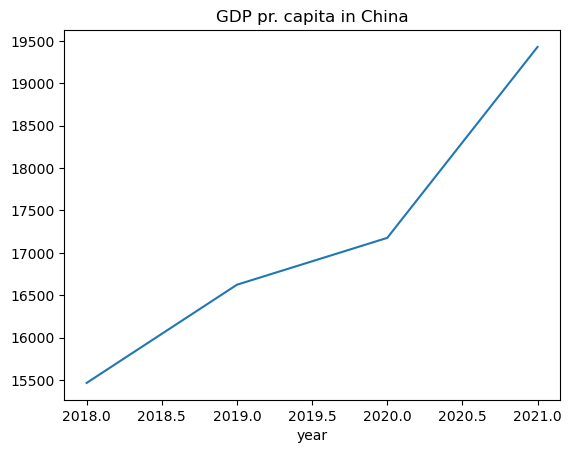

In [423]:
gdp_china = gdp_long.loc[gdp_long.country == 'China', :]
gdp_china.plot(x='year', y='gdp', legend=False);
plt.title("GDP pr. capita in China")
plt.show()

In [ ]:
import 

# Importing and cleaning the second dataset

In [ ]:
# import data
vac = pd.read_csv('vaccination1.csv') 
# inspect data
print(vac) 

In [ ]:
# Dropping the unecessary colums
drop_these = ['FREQUENCY', 'Flag Codes', 'INDICATOR', 'MEASURE']
vac.drop(drop_these, axis=1, inplace=True)
# Renaming columns
vac.rename(columns = {'LOCATION':'country', 'TIME':'year', 'SUBJECT':'subject', 'Value':'cv_rate'}, inplace=True)
vac.head()
#Removing the subject DTP, as we are interested in the measles vaccination rates
vac = vac[vac.country != 'DTP']

In [ ]:
# Reshaping from long to wide
vac = vac.pivot_table(index='country', columns='year', values='cv_rate').reset_index() 
vac.head()

In [ ]:
# Removing variables where data is missing
vac = vac.dropna()
print(vac)

In [ ]:
vac.info()

#Changing the type for country to string
vac.country = vac.country.astype('string')

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.